<a href="https://colab.research.google.com/github/kklambotskij/PolyMaster/blob/master/Kodland_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Важно**
Действия в случае, если ошибка в ячейке отказывается проходить:

1. Обновить страницу браузера(F5)
2.   Среда выполнения(Runtime) --> Сбросить настройки среды выполнения(Factory reset runtime)
3. Выполнить код во всех ячейках использую shift+enter начиная с самой первой



# Как использовать Google Colab

In [ ]:
# Виртуальная машина
# Jupyter notebook
# Hello world in jupyter
# Оперативная память, диск
# Горячие клавиши сtrl+enter, shift+enter
# Загруза и выгрузка файлов
# Перезагрузка страницы и возвращение к заводским настройкам

In [ ]:
# Практическое задание создать пару ячеек и написать print('hello world')

# Файлы жесткого диска и манипуляция ими




In [ ]:
# Библиотеки для манипуляции файлами
import os
import shutil

In [ ]:
os.listdir() #Возврщает список со строками(названиями файлов и папок), принимает аргументом путь до папки

['.config', 'sample_data']

In [ ]:
!ls sample_data #Делает тоже самое, только с помощью команы(в данном случае обязательно использовать "!")

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


Удаление/Cоздание папок

In [ ]:
os.mkdir('data') #coздает дерикторию

In [ ]:
!ls

data  sample_data


In [ ]:
shutil.rmtree('data') #удаляет дерикторию можно использовать !rm -rf /путь

Загрузка в виртуальную машину сторонних данных

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz #wget скачивает файл
!tar -zxvf MNIST.tar.gz #tar распаковывает архив

--2022-12-28 10:16:14--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2022-12-28 10:16:15--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [                 <=>]  33.20M  8.53MB/s    in 3.9s    

2022-12-28 10:16:19 (8.53 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

In [ ]:
os.listdir()

['.config', 'MNIST', 'MNIST.tar.gz', 'sample_data']

In [ ]:
# Практическое задание. Удалить архив MNIST.tar.gz с помощью команды !rm
# Решение !rm MNIST.tar.gz

### Перемещение по дереву файловой системы
Разграничение файлов на unix подобных системах(Linux, Mac OS) обозначается с помощью занака "/", 
"." - точка обозначает текущуюю папку, ".." - две точки обозначают предыдущую папку. Для того, чтобы сменить дерикторию используется команада cd(change directory)

In [ ]:
!ls

MNIST  MNIST.tar.gz  sample_data


Перемещаемся в папку MNIST

In [ ]:
cd MNIST

/content/MNIST


In [ ]:
!ls

processed  raw


Возвращаемся назад

In [ ]:
cd ..

/content


In [ ]:
# Практическое задание исследовать файлы внутри MNIST с помощью ls и /
!ls 

MNIST  MNIST.tar.gz  sample_data


### Разные датасеты для справки
https://pytorch.org/vision/stable/datasets.html

# Чтение изображений с помощью OpenCV(Open Source Computer Vision Library)

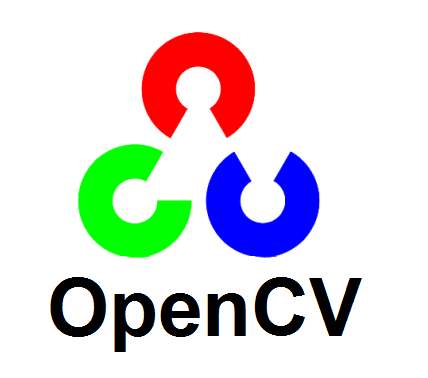

### Что такое OpenCV?

библиотека алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения с открытым кодом. Реализована на C/C++, также разрабатывается для Python и других языков программирования. Может свободно использоваться в академических и коммерческих целях.

### В нашей работе мы будем использовать:

*   [Numpy](https://www.numpy.org/) Библиотека для операции над разного размера массивами.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) Библиотека для разного рода задач компьютерного зрения.
*   [Matplotlib](https://matplotlib.org/) Библиотека для отображения графиков и изображения

In [ ]:
# Импорт OpenCV
import numpy as np
import os
import cv2
# библиотека для создания графиков и отборажения фото
import matplotlib.pyplot as plt

Давайте скачаем или загрузим фото на жесткий диск нашей виртуальной машины. Мы можем сделать это вручную или использовать команду wget url

In [ ]:
# Получение изображения
!wget https://www.meme-arsenal.com/memes/08185e1464fb0a40990fce0f39253ab7.jpg

--2022-12-28 10:16:21--  https://www.meme-arsenal.com/memes/08185e1464fb0a40990fce0f39253ab7.jpg
Resolving www.meme-arsenal.com (www.meme-arsenal.com)... 104.21.47.105, 172.67.146.191, 2606:4700:3032::ac43:92bf, ...
Connecting to www.meme-arsenal.com (www.meme-arsenal.com)|104.21.47.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169031 (165K) [image/jpeg]
Saving to: ‘08185e1464fb0a40990fce0f39253ab7.jpg’

08185e1464fb0a40990 100%[===================>] 165.07K  --.-KB/s    in 0.02s   

2022-12-28 10:16:21 (6.97 MB/s) - ‘08185e1464fb0a40990fce0f39253ab7.jpg’ saved [169031/169031]



In [ ]:
os.listdir()

['.config',
 'MNIST',
 '08185e1464fb0a40990fce0f39253ab7.jpg',
 'MNIST.tar.gz',
 'sample_data']

In [ ]:
# функция imread читатет изобржаение в оперативнаю память и передает его на переменную img
img = cv2.imread('08185e1464fb0a40990fce0f39253ab7.jpg', 0) #Ноль означает чернобелый
print(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# OpenCV возвращает изображение ввиде таблиц типа данных numpy
# Библиотека Numpy расшифровывается как numeriс python и создана для научных вычислений
type(img)

numpy.ndarray

Мы будем использовать библиотеку Matplotlib для создания графиков и показа загруженных изображений. plt.imshow - используется для показа изображений

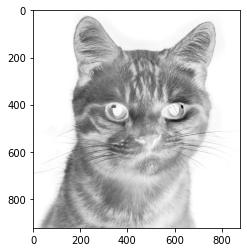

In [ ]:
plt.imshow(img, cmap='Greys')

In [ ]:
# Чтение цветного фото
img = cv2.imread('08185e1464fb0a40990fce0f39253ab7.jpg', cv2.IMREAD_COLOR) #Чтение файла
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Перевод из BGR в RGB

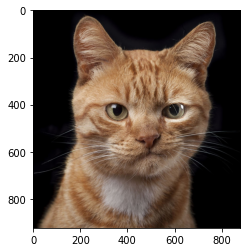

In [ ]:
plt.imshow(img)

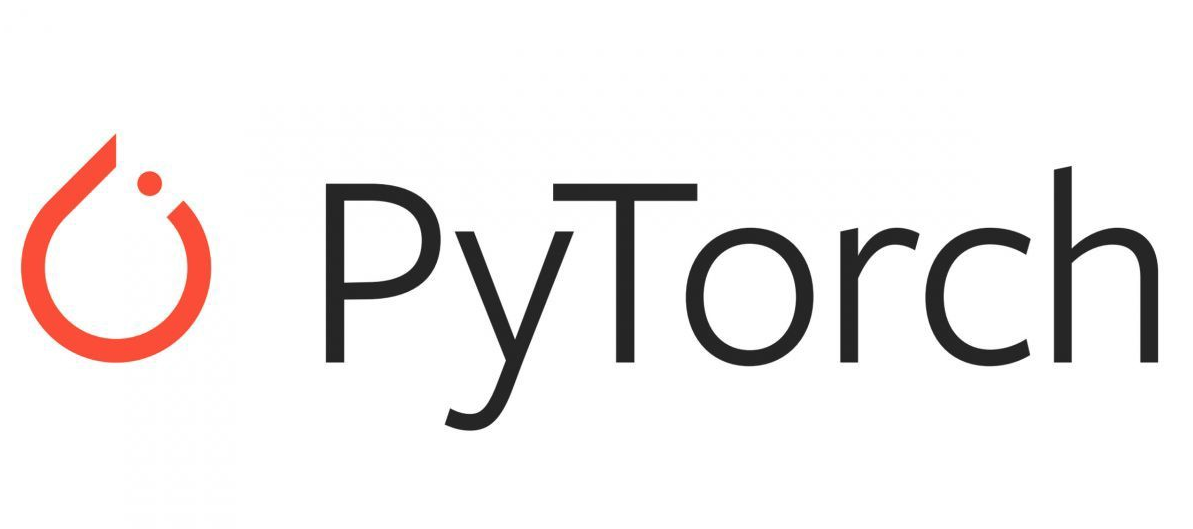

# Что такое Pytorch?

Это библиотка Python для научных вычислений и framework для исследований в области исскусствнного интелекта, с максимальной гибкостью и скоростью.


In [ ]:
# Импорт библиотеки
import torch

Создание пустой таблицы(матрицы 5 на 3)

In [ ]:
x = torch.empty(5, 3)
print(x)

tensor([[5.8369e-34, 0.0000e+00, 3.5032e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 7.1463e+22, 4.6241e+30],
        [1.0552e+24, 5.5757e-02, 1.8728e+31],
        [5.9571e-02, 7.0374e+22, 0.0000e+00]])


Создание таблицы заполненой нулями(матрицы 5 на 3)

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Создание тенсора напряму из данных

In [ ]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


Посмотреть размерность

In [ ]:
print(x.size())

torch.Size([2])


In [ ]:
# Практическое задание, создать torch tensor из нулей размером 2 на 3
# Практическое задание, создать torch tensor из случайных значений размером 5 на 4

### Добавления кода. 
Помимо библиотек, который уже заранее установлены на виртуальнаю машину нам понадобится стороной код, который не является частью популярных библиотек.

[Lesson1.zip](https://drive.google.com/file/d/1tBBrQZdUA3joWUNX690CJsG_KmBBt7XJ/view?usp=share_link)

In [ ]:
# Практическое задание посмотреть, что внутри папки intro (прочесть текстовый файл можно с помощью команды !cat)

In [ ]:
# Как импортировать свой код
from lesson1.train import train, test, get_data_loaders

# Переходим от Центрального процессора на видеокарту для ускорения

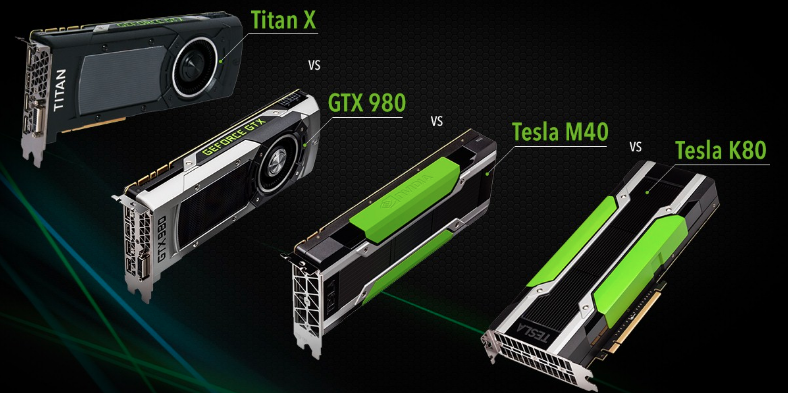

# Поменять среду выполнения

Заходим в Среда выполнения ----> Семнить среду выполения или (Runtime ---> Change runtime)
<br>
После этого необходимо перезапустить код в последующих двух ячейках



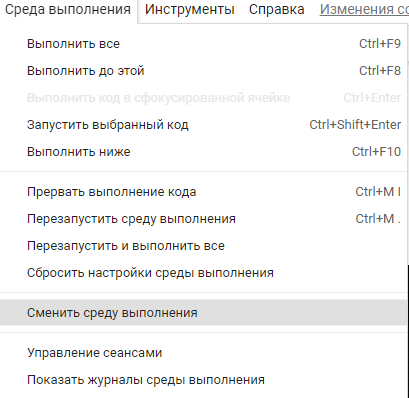

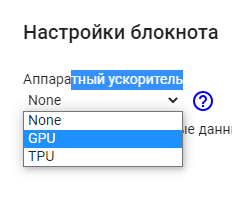

Выбираем Видеокарту(GPU)

In [ ]:
import torch
# ВАЖНО результат выполнения кода в этой ячейки должен быть cuda для правильного работы ноутбука
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device.type)

cuda


In [ ]:
# Посмотреть информацию про видеокарты
!nvidia-smi

Wed Dec 28 10:16:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

https://developer.nvidia.com/cuda-gpus

## Давайте поиграем для повторения пройденного материала
https://kahoot.it/

# Дома

In [ ]:
# Задание №1 создать пустую папку с праизвольным названием 

In [ ]:
# Задание №2 скачать свою картинку с помощью wget и показать ее с помощью cv2.impread